# Plackett–Luce model inference using LSR and I-LSR

This short notebook gives an example of how to use the `inference.py` Python module to find the spectral estimate (using LSR) and the maximum-likelihood estimate (using I-LSR).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import inference

%matplotlib inline

In [2]:
nb_items = 10
nb_rankings = 500
size_of_ranking = 3

### Generate some data

1. We generate random model parameters (uniformly on a logarithmic scale).
2. We generate rankings over random subsets of the items using a Plackett–Luce model with the previously generated parameters.

In [3]:
strengths = np.exp(np.random.rand(nb_items))
rankings = inference.generate_rankings(strengths, nb_rankings, size_of_ranking)

Below we give an example of what the data (i.e., the rankings) look like. We only show the 10 first rankings.

In [4]:
rankings[:10]

((1, 7, 9),
 (3, 4, 1),
 (8, 3, 9),
 (2, 9, 6),
 (1, 6, 3),
 (5, 7, 4),
 (1, 5, 3),
 (9, 7, 5),
 (5, 6, 3),
 (2, 0, 8))

### Compute the spectral and maximum-likelihood estimates

Both estimates are well-defined only if the comparison graph is strongly connected.
If it is not, the algorithm raises an error.

In [5]:
# Spectral estimate using LSR.
spectral_estimate = inference.lsr(nb_items, rankings)

# ML estimate using I-LSR.
ml_estimate = inference.ilsr(nb_items, rankings)

### Visualize the estimates

We plot the true parameters (the strengths that generated the rankings) and the two estimates using heat maps. The darker the cell is, the "stronger" the item is.

In [6]:
def plot_strengths(ax, strengths):
    img = np.log(strengths)[np.newaxis,:]
    ax.imshow(img, interpolation='nearest', cmap=plt.get_cmap('YlGnBu'))
    ax.yaxis.set_visible(False)

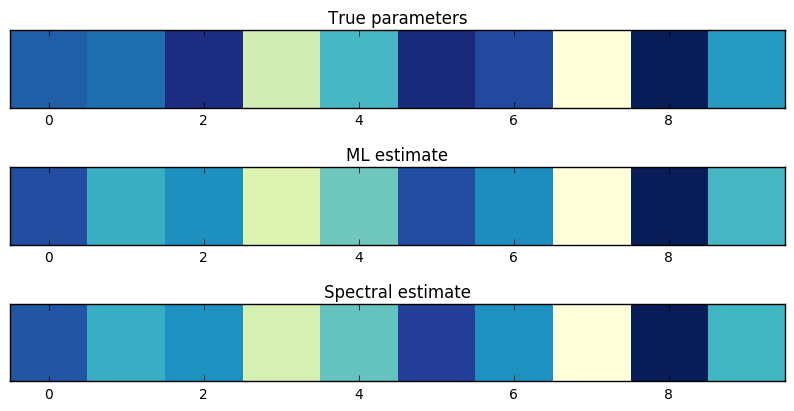

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10.0, 5.0))

plot_strengths(ax1, strengths)
ax1.set_title("True parameters")

plot_strengths(ax2, ml_estimate)
ax2.set_title("ML estimate")

plot_strengths(ax3, spectral_estimate)
ax3.set_title("Spectral estimate")

The true and estimated parameters look more or less alike!